In [2]:
%pylab inline
%load_ext rpy2.ipython

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%R
test <- read.table("test.csv", sep=",", header = TRUE) 
train <- read.table("train.csv", sep=",", header = TRUE)

In [4]:
%%R
train[1,]

  PassengerId Survived Pclass                    Name  Sex Age SibSp Parch
1           1        0      3 Braund, Mr. Owen Harris male  22     1     0
     Ticket Fare Cabin Embarked
1 A/5 21171 7.25              S


In [5]:
%%R
test[1,]

  PassengerId Pclass             Name  Sex  Age SibSp Parch Ticket   Fare Cabin
1         892      3 Kelly, Mr. James male 34.5     0     0 330911 7.8292      
  Embarked
1        Q


```
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.
```

In [6]:
%%R
print(summary(train[which(train$Pclass == 1),]$Fare))
print(summary(train[which(train$Pclass == 2),]$Fare))
print(summary(train[which(train$Pclass == 3),]$Fare))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   30.92   60.29   84.15   93.50  512.30 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   13.00   14.25   20.66   26.00   73.50 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.75    8.05   13.68   15.50   69.55 


In [7]:
%%R
print(summary(train[which(train$Pclass == 1),]$Sur))
print(summary(train[which(train$Pclass == 2),]$Sur))
print(summary(train[which(train$Pclass == 3),]$Sur))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.6296  1.0000  1.0000 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4728  1.0000  1.0000 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2424  0.0000  1.0000 


In [8]:
%%R 
library(rpart)

In [9]:
%%R
#?rpart

NULL


Or google it, I found this site: http://www.statmethods.net/advstats/cart.html

<b>formula:</b> The variable of interest, and the variables used for prediction. 

You write this down as formula = Survived ~ Sex + Age.

<b>data:</b> The data set used to build the decision tree (here train).

<b>method:</b> Type of prediction you want. Here you predict a categorical variable (dead or alive), so you're classifying: method = "class".

In [10]:
%%R
my_tree <- rpart(Survived ~ Sex + Age, 
                 data = train, 
                 method ="class")

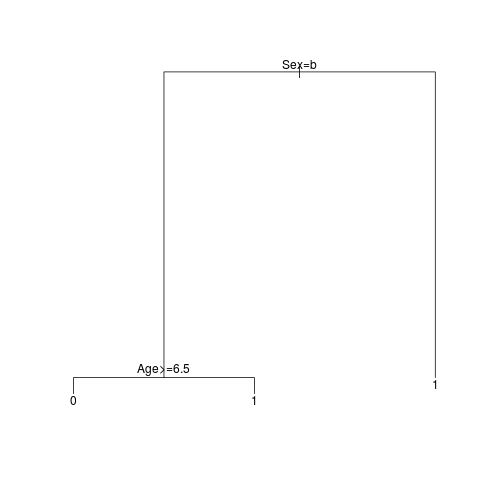

In [11]:
%%R
plot(my_tree)
text(my_tree)

In [12]:
%%R
#install.packages("rattle")
#library(rpart.plot)
#library(RColorBrewer)

NULL


In [13]:
%%R
#library(rattle)

NULL


To send a submission to Kaggle you need to predict the survival rates for the observations in the test set. In the last exercise of the previous chapter we created rather amateuristic predictions based on a single subset or none at all. Luckily, with our decision tree we can make use of some simple functions to "generate" our answer without having to manually perform subsetting.

First you make use of the rpart predict() function. You provide it the model (my_tree_two), the dataset for which predictions need to be made (test), and the type of prediction (class). You can check out the documentation of predict() by running ?predict in the console.

Next, you need to make sure your output is in line with the submission requirements of Kaggle: a csv file with exactly 418 entries and two columns: PassengerId and Survived. So you need to make a new data frame using data.frame(), and create a csv file using write.csv().

In [14]:
%%R
# Make your prediction using the test set
my_prediction <- predict(my_tree, test, type = "class")

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
my_solution <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction)

# Check that your data frame has 418 entries
nrow(my_solution)

# Write your solution to a csv file with the name my_solution.csv
write.csv(my_solution, file = "my_solution.csv", row.names = FALSE)

Now we will submit our prediction to Kaggle

https://www.kaggle.com/c/titanic
    
Then click on Make a submission: https://www.kaggle.com/c/titanic/submissions/attach

and I just dragged and dropped

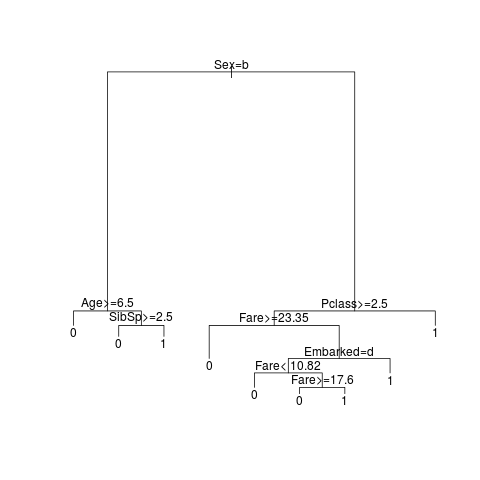

In [15]:
%%R
my_tree_two <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, 
                     data = train, method = "class")

# Visualize the decision tree using plot() and text()
plot(my_tree_two)
text(my_tree_two)

# Load in the packages to create a fancified version of your tree
#library(rattle)
#library(rpart.plot)
#library(RColorBrewer)

# Time to plot your fancy tree
#fancyRpartPlot(my_tree_two)

Above, you see the decision tree you just created. 

Looks nice, doesn't it? It's a very clear graph, that is easy to read and to interpret. Also, you see that thanks to the algorithm we can easily take into account more variables as opposed to creating the segments manually.


Based on your decision tree, what variables play the most important role to determine whether or not a passenger will survive?

In [16]:
%%R
# Make your prediction using the test set
my_prediction <- predict(my_tree_two, test, type = "class")

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
my_solution <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction)

# Check that your data frame has 418 entries
nrow(my_solution)

# Write your solution to a csv file with the name my_solution.csv
write.csv(my_solution, file = "my_solution2.csv", row.names = FALSE)

If you submitted the solution of the previous exercise, you got a result that outperformes a solution using purely gender. Hurray!

Maybe we can improve even more by making a more complex model? In rpart, the depth of our model is defined by two parameters:

the cp parameter determines when the splitting up of the decision tree stops.

the minsplit parameter monitors the amount of observations in a bucket. If a certain threshold is not reached (e.g minimum 10 passengers) no further splitting can be done.

Stated otherwise, if we set cp to zero (= no stopping of splits) and minsplit to 2 (= smallest bucket possible) we will create a super model! Or not? You can see the visualization by typing fancyRpartPlot(super_model). Looking complex, right?

In [17]:
%%R
my_tree_three <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, 
                       data=train, method="class", control=rpart.control(minsplit=50, cp=0))

However, if you submit this solution to Kaggle your score will be lower than the score of a simple model based on e.g. gender. Why? Because you went too far when setting the rules for the decisions trees. You created very specific rules based on the data in the training set that are hence only relevant for the training set but that cannot be generalized to unknows sets. You overfitted. So when creating decision trees, always be aware of this danger!

Data Science is an art that benefits from a human element. Enter feature engineering: creatively engineering your own features by combining the different existing variables.

While feature engineering is a discipline in itself, too broad to be covered here in detail, you will have a look at a simple example by creating your own new predictive attribute: family_size.

A valid assumption is that larger families need more time to get together on a sinking ship, and hence have less chance of surviving. Family size is determined by the variables SibSp and Parch, which indicate the number of family members a certain passenger is traveling with. So when doing feature engineering, you add a new variable family_size, which is the sum of SibSp and Parch plus one (the observation itself), to the test and train set.

In [18]:
%%R
train_two <- train
train_two$family_size <- train$SibSp + train$Parch + 1

# Create a new decision tree my_tree_three
my_tree_four <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + family_size, 
                      data = train_two, method="class")

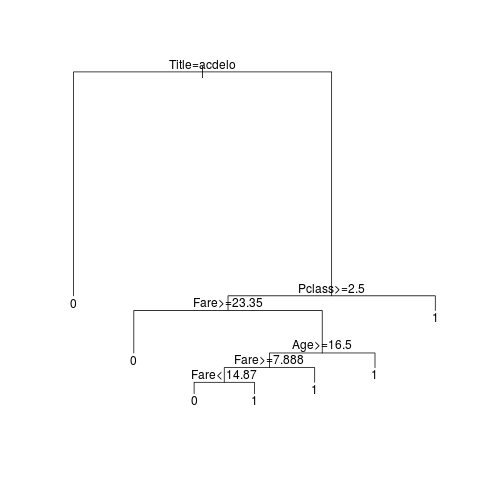

In [21]:
%%R
Title_train <- character(nrow(train))
Title_test <- character(nrow(test))
for (i in 1:nrow(test)){
    x <- strsplit(as.character(test$Name[i]), split = ", ")
    y <- strsplit(x[[1]][2], split = " ")
    Title_test[i] <- (y[[1]][1])
}
for (i in 1:nrow(train)){
    x <- strsplit(as.character(train$Name[i]), split = ", ")
    y <- strsplit(x[[1]][2], split = " ")
    Title_train[i] <- (y[[1]][1])
}
train$Title <- Title_train
test$Title <- Title_test

my_tree_five <- rpart(Survived ~ Title +Pclass + Sex + Age + SibSp + Parch + Fare + Embarked , 
                      data = train, method="class")
plot(my_tree_five)
text(my_tree_five)